# **Start Section:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Uninstall existing scikit-learn to avoid conflicts
!pip uninstall -y scikit-learn
# Install specific versions of libraries to avoid conflicts
!pip install scikit-learn==1.5.2
!pip install bayesian-optimization
!pip install optuna
!pip install gpboost
!pip install shap
!pip install ngboost
!pip install dask[dataframe]
!pip install torch seaborn
!pip install lightgbm
!pip install xgboost
!pip install lime
!pip install interpret
!pip install optunahub
!pip install cmaes
!pip install plotly kaleido
!pip install openpyxl
!pip install -U kaleido
!pip install properscoring
!pip install XlsxWriter
!pip install cython
!pip install mapie==0.6.0
!pip install pgbm
!pip install torch
!pip install cp
# !pip install mapie
!pip install torch skorch puncc
# Reinstall scikit-learn to the version required by ngboost
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.6.1
# Reinstall numpy first
!pip install numpy==1.26.4  # Use the version compatible with catboost
# Reinstall catboost
!pip install catboost

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6216b4f5f80851082edaf95de1ddf5343b77d78cf9e6a52123dc6d60b9987273
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Succ

In [ ]:
# Restart the runtime to apply changes
import os
os._exit(00)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.svm import SVR
import ngboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor
from ngboost import NGBRegressor
import optuna
import optunahub
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel
from optuna.samplers import RandomSampler
import random
import time
from ngboost.distns import Normal
from ngboost.scores import LogScore
from scipy.stats import norm
from optuna.samplers import BaseSampler
from optuna.samplers import GridSampler
from optuna.samplers import TPESampler
from optuna.samplers import PartialFixedSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import QMCSampler
from optuna.samplers import NSGAIIISampler
from optuna.samplers import NSGAIISampler
from optuna.samplers import BruteForceSampler
from optuna.samplers import GPSampler
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import plotly.express as px
from io import BytesIO
from openpyxl import Workbook, load_workbook
import os
import properscoring as ps
import io
from openpyxl.drawing.image import Image as openpyxlImage
import warnings
import xlsxwriter
from openpyxl.drawing.image import Image
from pgbm.sklearn import HistGradientBoostingRegressor
import torch
from pgbm.torch import PGBM
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import pickle
import json
from mapie.subsample import Subsample
from mapie.regression import MapieRegressor
from deel.puncc.metrics import regression_sharpness, regression_mean_coverage
from deel.puncc.api.prediction import BasePredictor, DualPredictor
from deel.puncc.regression import SplitCP, CVPlus, CQR
from deel.puncc.plotting import plot_prediction_intervals
from sklearn.model_selection import train_test_split
from typing_extensions import TypedDict
from typing import Union
from mapie.metrics import regression_coverage_score
from sklearn.model_selection import KFold
from PIL import Image as PImage
from openpyxl.utils.dataframe import dataframe_to_rows

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Using /root/.cache/torch_extensions/py311_cu124 as PyTorch extensions root...
Creating extension directory /root/.cache/torch_extensions/py311_cu124/split_decision...
Emitting ninja build file /root/.cache/torch_extensions/py311_cu124/split_decision/build.ninja...
Building extension module split_decision...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module split_decision...
Using /root/.cache/torch_extensions/py311_cu124 as PyTorch extensions root...
No modifications detected for re-loaded extension module split_decision, skipping build step...
Loading extension module split_decision...


In [2]:
train_data_path = "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/train.csv"
test_data_path = "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
print("Training data loaded successfully.")
print("Test data loaded successfully.")

Training data loaded successfully.
Test data loaded successfully.


In [3]:
print("\nShape of training data:", train_data.shape)
print("First 5 rows of training data:\n", train_data.head(5))
print("\nShape of test data:", test_data.shape)
print("First 5 rows of test data:\n", test_data.head(5))


Shape of training data: (47, 15)
First 5 rows of training data:
      pH   TDS    EC    TH   ca    mg  CO3  HCO3   NA    K  CHLORIDE  SULPHATE  \
0  7.90   552   865   452  272   180  0.2   4.5  260   44       375       681   
1  7.52  1985  2256  1054  529   525  0.0  15.0  272   47       728       324   
2  7.65  1865  2032   636  371   265  0.0   9.0  373   25       713       503   
3  7.25  4855  7856  2050  795  1255  0.0  12.5  335  106        81       676   
4  7.96  2855  3696   865  310   555  0.3   4.6  184  106       698       324   

   NITRATE  FLUORIDE  Pre monsoon EWQI   
0       60      0.40              70.52  
1       10      0.65             138.78  
2       54      0.85             113.07  
3       17      0.69             266.32  
4       25      1.20             158.05  

Shape of test data: (47, 15)
First 5 rows of test data:
      pH   TDS    EC    TH     ca      mg  CO3  HCO3   NA    K  CHLORIDE  \
0  8.38   625   975   320  120.0   200.0  0.0   5.8  280   35 

In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
x_test= X_test
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (47, 14)
Shape of y_train: (47,)
Shape of X_test: (47, 14)
Shape of y_test: (47,)


In [5]:
# Apply z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first five rows of the normalized data
print("\nFirst five rows of normalized X_train:")
print(X_train[:5])

print("\nFirst five rows of normalized X_test:")
print(X_test[:5])


First five rows of normalized X_train:
[[ 0.3797749  -1.15230942 -0.94309903 -0.47923131 -0.09229732 -0.56852482
  -0.03922784 -1.18768739 -0.02713192 -0.87884263 -0.2770724   1.15873613
   1.41276153 -1.25316406]
 [-0.78765707 -0.2953837  -0.52059702  0.45803078  1.31357822  0.10564733
  -0.50015494  1.61405127  0.07159325 -0.77136925  1.29937074 -0.45273785
  -1.61366471 -0.53733141]
 [-0.38827245 -0.36714301 -0.58863473 -0.19275917  0.44926563 -0.40242444
  -0.50015494  0.01305775  0.90253007 -1.55950739  1.23238307  0.35525611
   1.04959038  0.03533472]
 [-1.61714822  1.42085972  1.18034563  2.00871688  2.76868675  1.53215652
  -0.50015494  0.94697063  0.58990037  1.34227396 -1.59003071  1.13616647
  -1.18996504 -0.42279818]
 [ 0.56410627  0.22487128 -0.08321177  0.16377408  0.11557533  0.16427099
   0.19123571 -1.16100417 -0.6523913   1.34227396  1.1653954  -0.45273785
  -0.70573684  1.03750043]]

First five rows of normalized X_test:
[[ 1.85442582 -1.10865585 -0.90968766 -0.6847

# **Functions:**

In [6]:
feature_names = ['pH', 'TDS', 'EC', 'TH', 'ca', 'mg', 'CO3', 'HCO3', 'NA', 'K', 'CHLORIDE', 'SULPHATE', 'NITRATE', 'FLUORIDE']

In [7]:
def get_best_model_params(results, model_name):
    # Map model names to dictionary keys, assuming keys are strings like 'XGBoost' and not objects
    model_keys = {
        'LightGBM': 'LightGBM',
        'XGBoost': 'XGBoost',
        'GPBoost': 'GPBoost',
        'GBM': 'Gradient Boosting',
        'CatBoost': 'CatBoost',
        'NGBoost': 'NGBoost',
        'HGBR' : 'HistGradientBoosting',
        'PGBM' : 'PGBM'
    }

    # Ensure the requested model name is valid
    if model_name not in model_keys:
        raise ValueError(f"Model name '{model_name}' is not recognized. Available models are: {list(model_keys.keys())}")

    # Filter out entries for the specified model
    model_entries = {key: value for key, value in results.items() if key[0] == model_keys[model_name]}

    # Find the entry with the best (lowest) 'best_score'
    best_entry_key, best_entry_value = min(model_entries.items(), key=lambda item: item[1]['best_score'])

    # Return the best hyperparameters
    return best_entry_value['best_params']

In [8]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test.to_numpy()[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test.to_numpy()[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.to_numpy().ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

def conformal_predictions_MAPIE(model_class, best_params, X_train, y_train, X_test, y_test, model_name, excel_file_path):
    """
    Train and plot conformal prediction intervals using different strategies and save the plots and
    table of ymin/ymax/y_pred to different worksheets in an Excel file for each strategy.

    Parameters:
    - model_class: The class of the model to be used (e.g., LGBMRegressor).
    - best_params: Dictionary of best parameters for the model.
    - X_train: Training features.
    - y_train: Training target.
    - X_test: Test features.
    - y_test: Test target.
    - model_name: Name of the model for labeling purposes.
    - excel_file_path: Path to the Excel file where the plots will be saved.
    """
    # Set random seed for reproducibility
    SEED: int = 123
    np.random.seed(SEED)

    # Define miscoverage
    MISCOVERAGE: float = 0.1  # MISCOVERAGE = alpha # CONFIDENCE = 1-alpha
    warnings.filterwarnings("ignore")  # to suppress them

    # Create output directory
    os.makedirs('output/regression', exist_ok=True)

    # Define strategies and parameters
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Define base estimators
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    # Train strategies using MAPIE
    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set

    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred) # Corrected line: Removed y_test
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test.to_numpy() - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the results for the test set
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names) * 3 + 1 + len(_strategies) # Strategy plots + Goodness plots + Width plots + Comparison plot + Coverage vs Width plots
    fig, axs = plt.subplots(nrows=n_figs, figsize=(10, 5 * n_figs))

    plot_index = 0 # Keep track of the current plot index

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up, color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red', label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('EWQI')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Combined plot for comparison
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up, alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name], label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('EWQI')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1

    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted EWQI')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1

    plt.tight_layout()

    # Save plots and tabular data to Excel
    with io.BytesIO() as buf:
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet for the plots
        workbook = load_workbook(excel_file_path)
        plot_sheet_name = 'conformal_predictions_MAPIE'
        if plot_sheet_name in workbook.sheetnames:
            plot_sheet_name += '_new'
        plot_worksheet = workbook.create_sheet(title=plot_sheet_name)
        plot_worksheet.add_image(img, 'A1')

        all_rows = []
        y_true_np = y_test.to_numpy().ravel()  # To save multiple conversions
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = (y_true_np >= ymin_np) & (y_true_np <= ymax_np)
            residual_np = y_true_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_true_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np.astype(int),
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet.cell(row=i+2, column=j, value=value)

        # Save the workbook
        workbook.save(excel_file_path)

    plt.close()

In [9]:
def conformal_predictions_PUNCC(
    X_train, y_train, X_test, y_test, best_scores_autosampler, model_class,
    excel_file_path=None, model_params=None, alpha=0.1
):
    # Determine the default parameters for the model, or use provided ones
    if model_params is None:
        if model_class.__name__ == 'LGBMRegressor':
            model_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
        else:
            model_params = {}

    # Initialize and train the model using the provided class and parameters
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    model.fit(X_train, y_train)

    def evaluate_cp(X_test, y_test, model_cp, alpha):
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test, alpha=alpha)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test, y_pred_lower, y_pred_upper)
        return sharpness, coverage

    # Wrap the model in a BasePredictor
    base_predictor = BasePredictor(model, is_trained=True)

    # Initialize and fit the SplitCP conformal predictor
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train, fit_ratio=0.5)

    # Compute prediction intervals and metrics on the test set using SplitCP
    y_pred_splitcp, y_pred_lower_splitcp, y_pred_upper_splitcp = splitcp.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, splitcp, alpha)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"SplitCP - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for SplitCP
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    axs[0].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[0].fill_between(np.arange(len(y_test)), y_pred_lower_splitcp, y_pred_upper_splitcp, color='gray', alpha=0.5, label='Prediction interval')
    axs[0].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[0].set_title('Split Conformal Prediction')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('EWQI')
    axs[0].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Initialize and fit the CVPlus conformal predictor
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train)

    # Compute prediction intervals and metrics on the test set using CVPlus
    y_pred_cvplus, y_pred_lower_cvplus, y_pred_upper_cvplus = cvplus.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, cvplus, alpha)
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"CVPlus - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for CVPlus
    axs[1].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[1].fill_between(np.arange(len(y_test)), y_pred_lower_cvplus, y_pred_upper_cvplus, color='gray', alpha=0.5, label='Prediction interval')
    axs[1].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[1].set_title('Cross Validation Plus')
    axs[1].set_xlabel('Sample Number ')
    axs[1].set_ylabel('EWQI')
    axs[1].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Split the training data into proper training (fit) set and calibration set
    X_fit, X_calib, y_fit, y_calib = train_test_split(
        X_train, y_train, test_size=0.5, random_state=0
    )

    # Fit the upper and lower quantile models
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)

    _ = upper_quantile_model.fit(X_fit, y_fit)
    _ = lower_quantile_model.fit(X_fit, y_fit)

    # Wrap the upper and lower quantile models in a dual predictor
    dualpredictor = DualPredictor(
        [lower_quantile_model, upper_quantile_model], is_trained=[True, True]
    )

    # Initialize the CQR conformal predictor
    cqr = CQR(
        dualpredictor, train=False
    )  # train=False to use the pre-trained dual predictor

    # Compute nonconformity scores on the calibration set
    cqr.fit(X_calib=X_calib, y_calib=y_calib)

    # Compute prediction intervals and metrics on the test set
    y_pred_cqr, y_pred_lower_cqr, y_pred_upper_cqr = cqr.predict(X_test, alpha=alpha)
    y_pred_cqr = 0.5 * (y_pred_lower_cqr + y_pred_upper_cqr)
    sharpness, coverage = evaluate_cp(X_test, y_test, cqr, alpha)

    print(f"CQR - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"CQR - Average coverage: {coverage*100:.3f}%")

    # Plot the prediction intervals for CQR
    axs[2].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[2].fill_between(np.arange(len(y_test)), y_pred_lower_cqr, y_pred_upper_cqr, color='gray', alpha=0.5, label='Prediction interval')
    axs[2].plot(np.arange(len(y_test)), y_pred_cqr, color='red', label='Predicted mean', linewidth=1)
    axs[2].set_title('Conformalized Quantile Regression')
    axs[2].set_xlabel('Sample Number')
    axs[2].set_ylabel('EWQI')
    axs[2].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'SplitCP_lower': np.asarray(y_pred_lower_splitcp).reshape(-1),
        'SplitCP_upper': np.asarray(y_pred_upper_splitcp).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'CVPlus_lower': np.asarray(y_pred_lower_cvplus).reshape(-1),
        'CVPlus_upper': np.asarray(y_pred_upper_cvplus).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_pred_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_pred_upper_cqr).reshape(-1),
    }

    # Save all plots and values to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

In [10]:
def prediction_MAPIE_analysis(
    X_train,
    y_train,
    X_test,
    y_test,
    model_cls,
    model_params,
    excel_file_path=None,
    suptitle: str = "Prediction Intervals"
) -> None:
    # Initialize and fit the model with MAPIE using provided parameters
    mdl = model_cls(**model_params)
    mapie = MapieRegressor(mdl, method="plus", cv=KFold(n_splits=5, shuffle=True))
    mapie.fit(X_train, y_train)

    alpha = np.arange(0.05, 1, 0.05)
    y_train_pred, y_train_pis = mapie.predict(X_train, alpha=alpha)
    y_test_pred, y_test_pis = mapie.predict(X_test, alpha=alpha)

    # Visualization function
    def plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pred_low,
        y_train_pred_high,
        y_test,
        y_test_pred,
        y_test_pred_low,
        y_test_pred_high,
        suptitle: str,
    ) -> None:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

        ax1.errorbar(
            x=y_train,
            y=y_train_pred,
            yerr=(np.abs(y_train_pred - y_train_pred_low), np.abs(y_train_pred_high - y_train_pred)),
            alpha=0.8,
            label="train",
            fmt=".",
        )
        ax1.errorbar(
            x=y_test,
            y=y_test_pred,
            yerr=(np.abs(y_test_pred - y_test_pred_low), np.abs(y_test_pred_high - y_test_pred)),
            alpha=0.8,
            label="test",
            fmt=".",
        )
        ax1.plot(
            [y_train.min(), y_train.max()],
            [y_train.min(), y_train.max()],
            color="gray",
            alpha=0.5,
        )
        ax1.set_xlabel("Actual EWQI", fontsize=12)
        ax1.set_ylabel("Predicted EWQI", fontsize=12)
        ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

        ax2.scatter(
            x=y_train, y=y_train_pred_high - y_train_pred_low, alpha=0.8, label="train", marker="."
        )
        ax2.scatter(x=y_test, y=y_test_pred_high - y_test_pred_low, alpha=0.8, label="test", marker=".")
        ax2.set_xlabel("Actual EWQI", fontsize=12)
        ax2.set_ylabel("Interval width", fontsize=12)
        ax2.set_xscale("linear")
        ax2.set_ylim([0, np.max(y_test_pred_high - y_test_pred_low)*1.1])
        ax2.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        std_all = np.concatenate([
            y_train_pred_high - y_train_pred_low, y_test_pred_high - y_test_pred_low
        ])
        type_all = np.array(["train"] * len(y_train) + ["test"] * len(y_test))
        x_all = np.arange(len(std_all))
        order_all = np.argsort(std_all)
        std_order = std_all[order_all]
        type_order = type_all[order_all]
        ax3.scatter(
            x=x_all[type_order == "train"],
            y=std_order[type_order == "train"],
            alpha=0.8,
            label="train",
            marker=".",
        )
        ax3.scatter(
            x=x_all[type_order == "test"],
            y=std_order[type_order == "test"],
            alpha=0.8,
            label="test",
            marker=".",
        )
        ax3.set_xlabel("Order", fontsize=12)
        ax3.set_ylabel("Interval width", fontsize=12)
        ax3.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        ax1.set_title("Actual vs Predicted EWQI")
        ax2.set_title("Prediction interval width vs Actual EWQI")
        ax3.set_title("Ordered prediction interval width")
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.suptitle(suptitle, size=20)

        # Save plot to Excel
        if excel_file_path:
            save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_1')

        plt.close(fig)

    alpha_plot = int(np.where(alpha == 0.1)[0])
    plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pis[:, 0, alpha_plot],
        y_train_pis[:, 1, alpha_plot],
        y_test,
        y_test_pred,
        y_test_pis[:, 0, alpha_plot],
        y_test_pis[:, 1, alpha_plot],
        suptitle,
    )

    # Comparison of the uncertainty quantification methods
    Params = TypedDict("Params", {"method": str, "cv": Union[int, Subsample]})
    STRATEGIES = {
        "naive": Params(method="naive"),
        "cv": Params(method="base", cv=5),
        "cv_plus": Params(method="plus", cv=5),
        "cv_minmax": Params(method="minmax", cv=5),
        "jackknife_plus_ab": Params(method="plus", cv=Subsample(n_resamplings=20)),
    }
    y_pred, y_pis, scores = {}, {}, {}
    for strategy, params in STRATEGIES.items():
        mapie = MapieRegressor(mdl, **params)
        mapie.fit(X_train, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=alpha)
        scores[strategy] = [
            regression_coverage_score(y_test, y_pis[strategy][:, 0, i], y_pis[strategy][:, 1, i])
            for i, _ in enumerate(alpha)
        ]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel("Target coverage (1 - alpha)")
    ax.set_ylabel("Effective coverage")
    for strategy, params in STRATEGIES.items():
        ax.plot(1 - alpha, scores[strategy], label=strategy)
    plt.subplots_adjust(right=0.75)
    ax.plot([0, 1], [0, 1], ls="--", color="k")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', borderaxespad=0.)

    # Save plot to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_2')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

# **Hyperparameter Tuning using Autosampler Optuna**

In [11]:
best_scores_autosampler ={('Random Forest', 'MedianPruner'): {'best_score': 496.75467555727295,
  'best_params': {'n_estimators': 500,
   'criterion': 'squared_error',
   'max_depth': 30,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 0.5,
   'max_leaf_nodes': 200,
   'min_impurity_decrease': 0.0,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01},
  'test_mse': 496.75467555727295,
  'test_rmse': 22.28799397786335,
  'test_corr_coef': 0.9568118135387962,
  'pruner': 'MedianPruner'},
 ('Random Forest', 'NopPruner'): {'best_score': 503.0808858431874,
  'best_params': {'n_estimators': 500,
   'criterion': 'friedman_mse',
   'max_depth': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 0.5,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001},
  'test_mse': 503.0808858431874,
  'test_rmse': 22.42946468026349,
  'test_corr_coef': 0.957105306004359,
  'pruner': 'NopPruner'},
 ('Random Forest', 'PatientPruner'): {'best_score': 494.3690372906272,
  'best_params': {'n_estimators': 100,
   'criterion': 'squared_error',
   'max_depth': 40,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 1.0,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01},
  'test_mse': 494.3690372906272,
  'test_rmse': 22.23441110734951,
  'test_corr_coef': 0.9562405674458314,
  'pruner': 'PatientPruner'},
 ('Random Forest', 'PercentilePruner'): {'best_score': 503.0313085103356,
  'best_params': {'n_estimators': 500,
   'criterion': 'friedman_mse',
   'max_depth': 10,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 0.5,
   'max_leaf_nodes': 100,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01},
  'test_mse': 503.0313085103356,
  'test_rmse': 22.428359469884008,
  'test_corr_coef': 0.9571115814518224,
  'pruner': 'PercentilePruner'},
 ('Random Forest',
  'SuccessiveHalvingPruner'): {'best_score': 491.14038169701837, 'best_params': {'n_estimators': 200,
   'criterion': 'squared_error',
   'max_depth': 20,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 1.0,
   'max_leaf_nodes': 200,
   'min_impurity_decrease': 0.0,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0}, 'test_mse': 491.14038169701837, 'test_rmse': 22.16168724842534, 'test_corr_coef': 0.9566155447624353, 'pruner': 'SuccessiveHalvingPruner'},
 ('Random Forest', 'HyperbandPruner'): {'best_score': 496.7323070668855,
  'best_params': {'n_estimators': 500,
   'criterion': 'squared_error',
   'max_depth': 10,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 0.5,
   'max_leaf_nodes': 200,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0},
  'test_mse': 496.7323070668855,
  'test_rmse': 22.28749216638977,
  'test_corr_coef': 0.9568180183019787,
  'pruner': 'HyperbandPruner'},
 ('Random Forest', 'ThresholdPruner'): {'best_score': 491.11716942644233,
  'best_params': {'n_estimators': 200,
   'criterion': 'squared_error',
   'max_depth': 30,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 1.0,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.0,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001},
  'test_mse': 491.11716942644233,
  'test_rmse': 22.16116353954463,
  'test_corr_coef': 0.9566204368272285,
  'pruner': 'ThresholdPruner'},
 ('Random Forest', 'WilcoxonPruner'): {'best_score': 491.1403816970183,
  'best_params': {'n_estimators': 200,
   'criterion': 'squared_error',
   'max_depth': None,
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 1.0,
   'max_leaf_nodes': 100,
   'min_impurity_decrease': 0.0,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0},
  'test_mse': 491.1403816970183,
  'test_rmse': 22.16168724842534,
  'test_corr_coef': 0.9566155447624353,
  'pruner': 'WilcoxonPruner'},
 ('Gradient Boosting', 'MedianPruner'): {'best_score': 246.92577234301245,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.1,
   'n_estimators': 200,
   'subsample': 1.0,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 10,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': 'log2',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 50,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.001},
  'test_mse': 246.92577234301245,
  'test_rmse': 15.713871971701069,
  'test_corr_coef': 0.9735941852442844,
  'pruner': 'MedianPruner'},
 ('Gradient Boosting', 'NopPruner'): {'best_score': 179.37382529404596,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.1,
   'n_estimators': 300,
   'subsample': 0.5,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.1,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.0001,
   'ccp_alpha': 0.01},
  'test_mse': 179.37382529404596,
  'test_rmse': 13.393051380997758,
  'test_corr_coef': 0.9743167879012938,
  'pruner': 'NopPruner'},
 ('Gradient Boosting', 'PatientPruner'): {'best_score': 172.97644795787804,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 100,
   'subsample': 0.7,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 5,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.1,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 172.97644795787804,
  'test_rmse': 13.152051093189915,
  'test_corr_coef': 0.9756338223283527,
  'pruner': 'PatientPruner'},
 ('Gradient Boosting', 'PercentilePruner'): {'best_score': 177.39516164256244,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.1,
   'n_estimators': 700,
   'subsample': 0.7,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.0001,
   'ccp_alpha': 0.0},
  'test_mse': 177.39516164256244,
  'test_rmse': 13.318977499889488,
  'test_corr_coef': 0.9766656846274899,
  'pruner': 'PercentilePruner'},
 ('Gradient Boosting',
  'SuccessiveHalvingPruner'): {'best_score': 191.76697364173964, 'best_params': {'loss': 'squared_error',
   'learning_rate': 0.01,
   'n_estimators': 700,
   'subsample': 0.5,
   'criterion': 'friedman_mse',
   'min_samples_split': 10,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 5,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.1,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.0001,
   'ccp_alpha': 0.0}, 'test_mse': 191.76697364173964, 'test_rmse': 13.847995293245143, 'test_corr_coef': 0.9749485709964664, 'pruner': 'SuccessiveHalvingPruner'},
 ('Gradient Boosting', 'HyperbandPruner'): {'best_score': 179.05304179731965,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.2,
   'n_estimators': 500,
   'subsample': 0.9,
   'criterion': 'squared_error',
   'min_samples_split': 2,
   'min_samples_leaf': 1,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 3,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.1,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 179.05304179731965,
  'test_rmse': 13.381070278468746,
  'test_corr_coef': 0.9786794081431444,
  'pruner': 'HyperbandPruner'},
 ('Gradient Boosting', 'ThresholdPruner'): {'best_score': 200.26424250209485,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.2,
   'n_estimators': 700,
   'subsample': 0.9,
   'criterion': 'squared_error',
   'min_samples_split': 2,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 10,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 0.5,
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.001},
  'test_mse': 200.26424250209485,
  'test_rmse': 14.15147492320482,
  'test_corr_coef': 0.9716385551853826,
  'pruner': 'ThresholdPruner'},
 ('Gradient Boosting', 'WilcoxonPruner'): {'best_score': 155.60140598842722,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 500,
   'subsample': 0.5,
   'criterion': 'friedman_mse',
   'min_samples_split': 10,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 10,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': None,
   'tol': 0.001,
   'ccp_alpha': 0.01},
  'test_mse': 155.60140598842722,
  'test_rmse': 12.4740292603644,
  'test_corr_coef': 0.9770025527562957,
  'pruner': 'WilcoxonPruner'},
 ('XGBoost', 'MedianPruner'): {'best_score': 202.2765248257477,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 0.5,
   'subsample': 0.7,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 202.2765248257477,
  'test_rmse': 14.222395185964555,
  'test_corr_coef': 0.9763496183249326,
  'pruner': 'MedianPruner'},
 ('XGBoost', 'NopPruner'): {'best_score': 247.04580142815735,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.15,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.5,
   'reg_alpha': 0.01,
   'reg_lambda': 0.1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 247.04580142815735,
  'test_rmse': 15.71769071550135,
  'test_corr_coef': 0.9665487508903485,
  'pruner': 'NopPruner'},
 ('XGBoost', 'PatientPruner'): {'best_score': 158.10333415995365,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.1,
   'reg_lambda': 0.1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 158.10333415995365,
  'test_rmse': 12.57391483031254,
  'test_corr_coef': 0.97839476057588,
  'pruner': 'PatientPruner'},
 ('XGBoost', 'PercentilePruner'): {'best_score': 172.20453657968858,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.1,
   'max_depth': 3,
   'min_child_weight': 3,
   'gamma': 0,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 172.20453657968858,
  'test_rmse': 13.122672615732231,
  'test_corr_coef': 0.9767151361444325,
  'pruner': 'PercentilePruner'},
 ('XGBoost', 'SuccessiveHalvingPruner'): {'best_score': 205.33039082773124,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 0.1,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.5,
   'reg_alpha': 1,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 205.33039082773124,
  'test_rmse': 14.329354166456046,
  'test_corr_coef': 0.9701072947739625,
  'pruner': 'SuccessiveHalvingPruner'},
 ('XGBoost', 'HyperbandPruner'): {'best_score': 221.79419564107485,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.1,
   'max_depth': 5,
   'min_child_weight': 1,
   'gamma': 1,
   'subsample': 0.7,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.9,
   'reg_alpha': 1,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 221.79419564107485,
  'test_rmse': 14.892756482299536,
  'test_corr_coef': 0.9739919162805399,
  'pruner': 'HyperbandPruner'},
 ('XGBoost', 'ThresholdPruner'): {'best_score': 160.47803230691895,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 0.1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 160.47803230691895,
  'test_rmse': 12.667992433962018,
  'test_corr_coef': 0.9780942245984576,
  'pruner': 'ThresholdPruner'},
 ('XGBoost', 'WilcoxonPruner'): {'best_score': 202.04873822134363,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 5,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 202.04873822134363,
  'test_rmse': 14.214384904783731,
  'test_corr_coef': 0.9742452591297734,
  'pruner': 'WilcoxonPruner'},
 ('LightGBM', 'MedianPruner'): {'best_score': 275.3093325558832,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 1,
   'min_child_weight': 0.01,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 275.3093325558832,
  'test_rmse': 16.59244805795345,
  'test_corr_coef': 0.9620427695672663,
  'pruner': 'MedianPruner'},
 ('LightGBM', 'NopPruner'): {'best_score': 220.89088516680553,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.05,
   'num_leaves': 15,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 1,
   'min_child_weight': 0.01,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 220.89088516680553,
  'test_rmse': 14.862398365230476,
  'test_corr_coef': 0.969593032316463,
  'pruner': 'NopPruner'},
 ('LightGBM', 'PatientPruner'): {'best_score': 293.256336868178,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 5,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 0,
   'min_child_weight': 1e-05,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 293.256336868178,
  'test_rmse': 17.124728811522182,
  'test_corr_coef': 0.9612642435869498,
  'pruner': 'PatientPruner'},
 ('LightGBM', 'PercentilePruner'): {'best_score': 208.04661368194607,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.1,
   'num_leaves': 15,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'reg_alpha': 1,
   'reg_lambda': 0.1,
   'min_child_weight': 1e-05,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 208.04661368194607,
  'test_rmse': 14.423821049983463,
  'test_corr_coef': 0.9706833451015119,
  'pruner': 'PercentilePruner'},
 ('LightGBM', 'SuccessiveHalvingPruner'): {'best_score': 285.10422465175134,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'num_leaves': 31,
   'max_depth': 5,
   'min_child_samples': 1,
   'subsample': 0.9,
   'colsample_bytree': 1.0,
   'reg_alpha': 0.1,
   'reg_lambda': 1,
   'min_child_weight': 0.1,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 285.10422465175134,
  'test_rmse': 16.885029601743412,
  'test_corr_coef': 0.967594883445051,
  'pruner': 'SuccessiveHalvingPruner'},
 ('LightGBM', 'HyperbandPruner'): {'best_score': 218.09993198510696,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'num_leaves': 15,
   'max_depth': 7,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 1,
   'min_child_weight': 0.01,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 218.09993198510696,
  'test_rmse': 14.768206796531086,
  'test_corr_coef': 0.969990884780988,
  'pruner': 'HyperbandPruner'},
 ('LightGBM', 'ThresholdPruner'): {'best_score': 273.2653318542822,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'num_leaves': 63,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.7,
   'colsample_bytree': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'min_child_weight': 0.1,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 273.2653318542822,
  'test_rmse': 16.53073899903698,
  'test_corr_coef': 0.9602374083441543,
  'pruner': 'ThresholdPruner'},
 ('LightGBM', 'WilcoxonPruner'): {'best_score': 249.73959845108345,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'num_leaves': 31,
   'max_depth': 3,
   'min_child_samples': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 1,
   'min_child_weight': 1e-05,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 249.73959845108345,
  'test_rmse': 15.803151535408482,
  'test_corr_coef': 0.9661905517591606,
  'pruner': 'WilcoxonPruner'},
 ('GPBoost', 'MedianPruner'): {'best_score': 294.31241844640857,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.15,
   'max_depth': 3,
   'num_leaves': 63,
   'min_child_samples': 5,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.5,
   'reg_lambda': 0.1,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 294.31241844640857,
  'test_rmse': 17.15553608740947,
  'test_corr_coef': 0.9606442258937739,
  'pruner': 'MedianPruner'},
 ('GPBoost', 'NopPruner'): {'best_score': 293.8509181932583,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'max_depth': 3,
   'num_leaves': 15,
   'min_child_samples': 5,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 293.8509181932583,
  'test_rmse': 17.14208033446519,
  'test_corr_coef': 0.9611876992389994,
  'pruner': 'NopPruner'},
 ('GPBoost', 'PatientPruner'): {'best_score': 300.3365038091008,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.1,
   'max_depth': 3,
   'num_leaves': 63,
   'min_child_samples': 5,
   'subsample': 0.6,
   'colsample_bytree': 1.0,
   'reg_alpha': 1.0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 300.3365038091008,
  'test_rmse': 17.330219381447563,
  'test_corr_coef': 0.960933527032995,
  'pruner': 'PatientPruner'},
 ('GPBoost', 'PercentilePruner'): {'best_score': 293.66553328376835,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.15,
   'max_depth': 3,
   'num_leaves': 63,
   'min_child_samples': 5,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.5,
   'reg_lambda': 0.1,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 293.66553328376835,
  'test_rmse': 17.136672176469045,
  'test_corr_coef': 0.9606075902657396,
  'pruner': 'PercentilePruner'},
 ('GPBoost', 'SuccessiveHalvingPruner'): {'best_score': 292.65871070374465,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 5,
   'subsample': 1.0,
   'colsample_bytree': 1.0,
   'reg_alpha': 0.1,
   'reg_lambda': 0,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 292.65871070374465,
  'test_rmse': 17.107270697096737,
  'test_corr_coef': 0.9608271533578635,
  'pruner': 'SuccessiveHalvingPruner'},
 ('GPBoost', 'HyperbandPruner'): {'best_score': 299.7572591322916,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 5,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 299.7572591322916,
  'test_rmse': 17.313499332379102,
  'test_corr_coef': 0.961018527269196,
  'pruner': 'HyperbandPruner'},
 ('GPBoost', 'ThresholdPruner'): {'best_score': 306.24281630665024,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': 5,
   'num_leaves': 31,
   'min_child_samples': 5,
   'subsample': 0.8,
   'colsample_bytree': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 1.0,
   'min_child_weight': 1e-05,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 306.24281630665024,
  'test_rmse': 17.49979475041494,
  'test_corr_coef': 0.9620809774015656,
  'pruner': 'ThresholdPruner'},
 ('GPBoost', 'WilcoxonPruner'): {'best_score': 294.31241844640857,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.15,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 5,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.5,
   'reg_lambda': 0.1,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 294.31241844640857,
  'test_rmse': 17.15553608740947,
  'test_corr_coef': 0.9606442258937739,
  'pruner': 'WilcoxonPruner'},
 ('CatBoost', 'MedianPruner'): {'best_score': 368.5205933957056,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.1,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 1,
   'rsm': 0.8,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 368.5205933957056,
  'test_rmse': 19.196890201168145,
  'test_corr_coef': 0.9564404896870229,
  'pruner': 'MedianPruner'},
 ('CatBoost', 'NopPruner'): {'best_score': 352.7919134205213,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 3,
   'border_count': 32,
   'min_data_in_leaf': 5,
   'rsm': 0.8,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 352.7919134205213,
  'test_rmse': 18.782755746176367,
  'test_corr_coef': 0.9609618632008907,
  'pruner': 'NopPruner'},
 ('CatBoost', 'PatientPruner'): {'best_score': 375.9855113971838,
  'best_params': {'iterations': 500,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 3,
   'border_count': 64,
   'min_data_in_leaf': 1,
   'rsm': 0.6,
   'bagging_temperature': 0,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 375.9855113971838,
  'test_rmse': 19.39034582974692,
  'test_corr_coef': 0.9539191199606991,
  'pruner': 'PatientPruner'},
 ('CatBoost', 'PercentilePruner'): {'best_score': 352.7919134205213,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 3,
   'border_count': 32,
   'min_data_in_leaf': 1,
   'rsm': 0.8,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 352.7919134205213,
  'test_rmse': 18.782755746176367,
  'test_corr_coef': 0.9609618632008907,
  'pruner': 'PercentilePruner'},
 ('CatBoost', 'SuccessiveHalvingPruner'): {'best_score': 352.7919134205213,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 3,
   'border_count': 32,
   'min_data_in_leaf': 1,
   'rsm': 0.8,
   'bagging_temperature': 0,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 352.7919134205213,
  'test_rmse': 18.782755746176367,
  'test_corr_coef': 0.9609618632008907,
  'pruner': 'SuccessiveHalvingPruner'},
 ('CatBoost', 'HyperbandPruner'): {'best_score': 352.7919134205213,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 3,
   'border_count': 32,
   'min_data_in_leaf': 10,
   'rsm': 0.8,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 352.7919134205213,
  'test_rmse': 18.782755746176367,
  'test_corr_coef': 0.9609618632008907,
  'pruner': 'HyperbandPruner'},
 ('CatBoost', 'ThresholdPruner'): {'best_score': 392.42173602696965,
  'best_params': {'iterations': 500,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 128,
   'min_data_in_leaf': 20,
   'rsm': 0.6,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 392.42173602696965,
  'test_rmse': 19.809637453193577,
  'test_corr_coef': 0.9559602858933206,
  'pruner': 'ThresholdPruner'},
 ('CatBoost', 'WilcoxonPruner'): {'best_score': 352.7919134205213,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 3,
   'border_count': 32,
   'min_data_in_leaf': 10,
   'rsm': 0.8,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 352.7919134205213,
  'test_rmse': 18.782755746176367,
  'test_corr_coef': 0.9609618632008907,
  'pruner': 'WilcoxonPruner'},
 ('NGBoost', 'MedianPruner'): {'best_score': 187.06827944189018,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 1.0,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 187.06827944189018,
  'test_rmse': 13.677290646977207,
  'test_corr_coef': 0.975231475429528,
  'pruner': 'MedianPruner'},
 ('NGBoost', 'NopPruner'): {'best_score': 209.38710406757338,
  'best_params': {'n_estimators': 1000,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 1.0,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 209.38710406757338,
  'test_rmse': 14.470214375315017,
  'test_corr_coef': 0.9729356488592789,
  'pruner': 'NopPruner'},
 ('NGBoost', 'PatientPruner'): {'best_score': 191.77444693892596,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 191.77444693892596,
  'test_rmse': 13.848265123795326,
  'test_corr_coef': 0.9739871076514147,
  'pruner': 'PatientPruner'},
 ('NGBoost', 'PercentilePruner'): {'best_score': 185.16894960952425,
  'best_params': {'n_estimators': 1000,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 185.16894960952425,
  'test_rmse': 13.607679802579286,
  'test_corr_coef': 0.9748659997085384,
  'pruner': 'PercentilePruner'},
 ('NGBoost', 'SuccessiveHalvingPruner'): {'best_score': 180.60640140993084,
  'best_params': {'n_estimators': 1000,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 180.60640140993084,
  'test_rmse': 13.438988109598537,
  'test_corr_coef': 0.9752268823949123,
  'pruner': 'SuccessiveHalvingPruner'},
 ('NGBoost', 'HyperbandPruner'): {'best_score': 216.92477831481847,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.03,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 216.92477831481847,
  'test_rmse': 14.728366450995795,
  'test_corr_coef': 0.9732080178297102,
  'pruner': 'HyperbandPruner'},
 ('NGBoost', 'ThresholdPruner'): {'best_score': 201.08350394436124,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 201.08350394436124,
  'test_rmse': 14.180391530009361,
  'test_corr_coef': 0.9737433304606445,
  'pruner': 'ThresholdPruner'},
 ('NGBoost', 'WilcoxonPruner'): {'best_score': 180.8906059636069,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 180.8906059636069,
  'test_rmse': 13.44955783524525,
  'test_corr_coef': 0.9750898794065623,
  'pruner': 'WilcoxonPruner'},
 ('HistGradientBoosting', 'MedianPruner'): {'best_score': 309.71048974232986,
  'best_params': {'learning_rate': 0.15,
   'max_iter': 100,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 31,
   'l2_regularization': 0.5,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 309.71048974232986,
  'test_rmse': 17.598593402381052,
  'test_corr_coef': 0.9582676889706158,
  'pruner': 'MedianPruner'},
 ('HistGradientBoosting', 'NopPruner'): {'best_score': 307.41036487874993,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 300,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 15,
   'l2_regularization': 1.0,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 307.41036487874993,
  'test_rmse': 17.533121937599986,
  'test_corr_coef': 0.9573016026631201,
  'pruner': 'NopPruner'},
 ('HistGradientBoosting', 'PatientPruner'): {'best_score': 307.14533474906676,
  'best_params': {'learning_rate': 0.1,
   'max_iter': 400,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 15,
   'l2_regularization': 0.5,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 307.14533474906676,
  'test_rmse': 17.52556232333407,
  'test_corr_coef': 0.9571084111490522,
  'pruner': 'PatientPruner'},
 ('HistGradientBoosting',
  'PercentilePruner'): {'best_score': 305.50458250552157, 'best_params': {'learning_rate': 0.1,
   'max_iter': 200,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 31,
   'l2_regularization': 0.5,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 305.50458250552157, 'test_rmse': 17.478689381802102, 'test_corr_coef': 0.957444692058178, 'pruner': 'PercentilePruner'},
 ('HistGradientBoosting',
  'SuccessiveHalvingPruner'): {'best_score': 306.9466510692115, 'best_params': {'learning_rate': 0.1,
   'max_iter': 300,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': None,
   'l2_regularization': 0.5,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 306.9466510692115, 'test_rmse': 17.5198930096394, 'test_corr_coef': 0.9571560877136178, 'pruner': 'SuccessiveHalvingPruner'},
 ('HistGradientBoosting',
  'HyperbandPruner'): {'best_score': 305.50458250552157, 'best_params': {'learning_rate': 0.1,
   'max_iter': 200,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 15,
   'l2_regularization': 0.5,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 305.50458250552157, 'test_rmse': 17.478689381802102, 'test_corr_coef': 0.957444692058178, 'pruner': 'HyperbandPruner'},
 ('HistGradientBoosting',
  'ThresholdPruner'): {'best_score': 307.41036487874993, 'best_params': {'learning_rate': 0.1,
   'max_iter': 300,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 63,
   'l2_regularization': 1.0,
   'max_bins': 64,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 307.41036487874993, 'test_rmse': 17.533121937599986, 'test_corr_coef': 0.9573016026631201, 'pruner': 'ThresholdPruner'},
 ('HistGradientBoosting', 'WilcoxonPruner'): {'best_score': 332.2677552523576,
  'best_params': {'learning_rate': 0.15,
   'max_iter': 100,
   'max_depth': None,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 31,
   'l2_regularization': 0.1,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 10,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 332.2677552523576,
  'test_rmse': 18.228213166746695,
  'test_corr_coef': 0.9545670661006471,
  'pruner': 'WilcoxonPruner'},
 ('PGBM', 'MedianPruner'): {'best_score': 221.2292201678912,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_leaves': 51,
   'min_split_gain': 0.5,
   'reg_lambda': 0.1,
   'feature_fraction': 0.7,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'normal'},
  'test_mse': 221.2292201678912,
  'test_rmse': 14.873776257826767,
  'test_corr_coef': 0.9694539261446242,
  'pruner': 'MedianPruner'},
 ('PGBM', 'NopPruner'): {'best_score': 234.6117422362524,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_leaves': 29,
   'min_split_gain': 0.1,
   'reg_lambda': 1.0,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 234.6117422362524,
  'test_rmse': 15.317040909922921,
  'test_corr_coef': 0.9672758451299508,
  'pruner': 'NopPruner'},
 ('PGBM', 'PatientPruner'): {'best_score': 219.11709553917763,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'max_leaves': 43,
   'min_split_gain': 1.0,
   'reg_lambda': 10.0,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 219.11709553917763,
  'test_rmse': 14.802604349883085,
  'test_corr_coef': 0.9683606519348372,
  'pruner': 'PatientPruner'},
 ('PGBM', 'PercentilePruner'): {'best_score': 256.5075335786026,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.1,
   'max_leaves': 44,
   'min_split_gain': 0.5,
   'reg_lambda': 5.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 1.0,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'normal'},
  'test_mse': 256.5075335786026,
  'test_rmse': 16.015852571081023,
  'test_corr_coef': 0.9665857967975906,
  'pruner': 'PercentilePruner'},
 ('PGBM', 'SuccessiveHalvingPruner'): {'best_score': 249.25232882732638,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_leaves': 25,
   'min_split_gain': 1.0,
   'reg_lambda': 5.0,
   'feature_fraction': 0.7,
   'bagging_fraction': 1.0,
   'tree_correlation': 0.3,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'normal'},
  'test_mse': 249.25232882732638,
  'test_rmse': 15.787727158376104,
  'test_corr_coef': 0.9668261945151909,
  'pruner': 'SuccessiveHalvingPruner'},
 ('PGBM', 'HyperbandPruner'): {'best_score': 208.85696915853305,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'max_leaves': 62,
   'min_split_gain': 0.5,
   'reg_lambda': 0.1,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 208.85696915853305,
  'test_rmse': 14.451884623070205,
  'test_corr_coef': 0.9695766222368406,
  'pruner': 'HyperbandPruner'},
 ('PGBM', 'ThresholdPruner'): {'best_score': 188.39989807335596,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.1,
   'max_leaves': 47,
   'min_split_gain': 0.0,
   'reg_lambda': 0.1,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.7,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 3,
   'max_bin': 64,
   'distribution': 'normal'},
  'test_mse': 188.39989807335596,
  'test_rmse': 13.725884236483854,
  'test_corr_coef': 0.9731083432106779,
  'pruner': 'ThresholdPruner'},
 ('PGBM', 'WilcoxonPruner'): {'best_score': 227.90936067787433,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'max_leaves': 34,
   'min_split_gain': 0.5,
   'reg_lambda': 5.0,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 3,
   'max_bin': 128,
   'distribution': 'normal'},
  'test_mse': 227.90936067787433,
  'test_rmse': 15.096667204316134,
  'test_corr_coef': 0.966699620154065,
  'pruner': 'WilcoxonPruner'}}

# **Conformal Predictions with Lightgbm**

In [12]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')

In [13]:
conformal_predictions_MAPIE(LGBMRegressor, best_params, X_train, y_train, X_test, y_test, "LightGBM","./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/LightGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 14.4238
  Interval Width: 99.8164
  Coverage: 54.28%
  CWC: 145.4545
  SSC: 10171.3646

Strategy: Cross Validation +
  RMSE: 14.4238
  Interval Width: 105.2966
  Coverage: 57.18%
  CWC: 150.3897
  SSC: 11333.4680

Strategy: Jackknife+ after Bootstrapping
  RMSE: 14.4238
  Interval Width: 112.4629
  Coverage: 61.25%
  CWC: 156.0429
  SSC: 12938.5807



In [14]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, LGBMRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/LightGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 142.468
SplitCP - Average coverage: 97.872%
CVPlus - Average prediction intervals width (sharpness): 105.104
CVPlus - Average coverage: 100.000%
CQR - Average prediction intervals width (sharpness): 128.574
CQR - Average coverage: 97.872%


In [15]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, LGBMRegressor, best_params, "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/LightGBM.xlsx", "LightGBM Prediction Intervals")

# **Conformal Predictions with XGBoost**

In [16]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')

In [17]:
conformal_predictions_MAPIE(XGBRegressor, best_params, X_train, y_train, X_test, y_test, "XGBoost", "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/XGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 12.5739
  Interval Width: 96.0734
  Coverage: 54.19%
  CWC: 140.0872
  SSC: 9388.2094

Strategy: Cross Validation +
  RMSE: 12.5739
  Interval Width: 91.1738
  Coverage: 52.06%
  CWC: 134.8827
  SSC: 8519.0320

Strategy: Jackknife+ after Bootstrapping
  RMSE: 12.5739
  Interval Width: 96.3476
  Coverage: 56.72%
  CWC: 138.0445
  SSC: 9515.3421



In [18]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, XGBRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/XGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 95.501
SplitCP - Average coverage: 100.000%
CVPlus - Average prediction intervals width (sharpness): 104.644
CVPlus - Average coverage: 100.000%
CQR - Average prediction intervals width (sharpness): 134.245
CQR - Average coverage: 97.872%


In [19]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, XGBRegressor, best_params,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/XGBoost.xlsx", "XGBR Prediction Intervals")

# **Conformal Predictions with GPBoost**

In [20]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')

In [21]:
conformal_predictions_MAPIE(GPBoostRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/GPBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 17.1073
  Interval Width: 123.6150
  Coverage: 63.60%
  CWC: 168.6066
  SSC: 15573.3297

Strategy: Cross Validation +
  RMSE: 17.1073
  Interval Width: 128.2656
  Coverage: 64.10%
  CWC: 174.3111
  SSC: 16771.0103

Strategy: Jackknife+ after Bootstrapping
  RMSE: 17.1073
  Interval Width: 101.4661
  Coverage: 56.54%
  CWC: 145.5618
  SSC: 10710.6064



In [22]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GPBoostRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/GPBoost.xlsx",best_params)

Finished loading model, total used 500 iterations
SplitCP - Average prediction intervals width (sharpness): 103.460
SplitCP - Average coverage: 93.617%
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
CVPlus - Average prediction intervals width (sharpness): 123.375
CVPlus - Average coverage: 100.000%
Finished loading model, total used 500 iterations
Finished loading model, total used 500 iterations
CQR - Average prediction intervals width (sharpness): 118.073
CQR - Average coverage: 93.617%


In [23]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GPBoostRegressor, best_params, "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/GPBoost.xlsx", "GPBoost Prediction Intervals")

# **Conformal Predictions with NGBoost**

In [24]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

In [25]:
conformal_predictions_MAPIE(NGBRegressor, best_params, X_train, y_train, X_test, y_test, "NGBoost","./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/NGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 14.1976
  Interval Width: 97.7511
  Coverage: 54.19%
  CWC: 142.5334
  SSC: 9756.8486

Strategy: Cross Validation +
  RMSE: 14.0360
  Interval Width: 100.7520
  Coverage: 56.22%
  CWC: 144.8567
  SSC: 10365.9117

Strategy: Jackknife+ after Bootstrapping
  RMSE: 14.3802
  Interval Width: 102.2262
  Coverage: 57.94%
  CWC: 145.2176
  SSC: 10739.3374



In [26]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, NGBRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/NGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 90.296
SplitCP - Average coverage: 97.872%
CVPlus - Average prediction intervals width (sharpness): 110.229
CVPlus - Average coverage: 100.000%
CQR - Average prediction intervals width (sharpness): 93.759
CQR - Average coverage: 97.872%


In [27]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, NGBRegressor, best_params,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/NGBoost.xlsx","NGBoost Prediction Intervals")

# **Conformal Predictions with Gradient Boosting**

In [28]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')

In [29]:
conformal_predictions_MAPIE(GradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/Gradient Boosting.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 12.4740
  Interval Width: 94.7633
  Coverage: 51.83%
  CWC: 140.4075
  SSC: 9135.6771

Strategy: Cross Validation +
  RMSE: 12.4740
  Interval Width: 118.6210
  Coverage: 60.71%
  CWC: 165.2317
  SSC: 14238.9792

Strategy: Jackknife+ after Bootstrapping
  RMSE: 12.4740
  Interval Width: 103.2792
  Coverage: 58.67%
  CWC: 145.9654
  SSC: 10904.8192



In [30]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GradientBoostingRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/Gradient Boosting.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 103.640
SplitCP - Average coverage: 97.872%
CVPlus - Average prediction intervals width (sharpness): 110.269
CVPlus - Average coverage: 100.000%
CQR - Average prediction intervals width (sharpness): 112.360
CQR - Average coverage: 95.745%


In [31]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GradientBoostingRegressor, best_params, "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/Gradient Boosting.xlsx", "Gradient Boosting Prediction Intervals")

# **Conformal Predictions with CatBoost**

In [32]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')

In [33]:
conformal_predictions_MAPIE(CatBoostRegressor, best_params, X_train, y_train, X_test, y_test, "CatBoost","./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/CatBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 18.7828
  Interval Width: 92.6605
  Coverage: 53.33%
  CWC: 135.9077
  SSC: 8938.7684

Strategy: Cross Validation +
  RMSE: 18.7828
  Interval Width: 88.6028
  Coverage: 51.88%
  CWC: 131.2397
  SSC: 8229.2926

Strategy: Jackknife+ after Bootstrapping
  RMSE: 18.7828
  Interval Width: 101.0653
  Coverage: 60.39%
  CWC: 141.0979
  SSC: 10657.3357



In [34]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, CatBoostRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/CatBoost.xlsx")

Streaming output truncated to the last 5000 lines.
8:	learn: 46.3961115	total: 5.2ms	remaining: 573ms
9:	learn: 45.9899423	total: 5.57ms	remaining: 551ms
10:	learn: 45.6170339	total: 6.07ms	remaining: 546ms
11:	learn: 45.1696619	total: 6.6ms	remaining: 544ms
12:	learn: 44.8263490	total: 6.79ms	remaining: 516ms
13:	learn: 44.4420145	total: 7.31ms	remaining: 515ms
14:	learn: 44.1134160	total: 7.83ms	remaining: 514ms
15:	learn: 43.7214617	total: 8.36ms	remaining: 514ms
16:	learn: 43.2560046	total: 8.86ms	remaining: 512ms
17:	learn: 42.9326433	total: 9.37ms	remaining: 511ms
18:	learn: 42.6824898	total: 9.87ms	remaining: 510ms
19:	learn: 42.3733718	total: 10.4ms	remaining: 508ms
20:	learn: 41.8888689	total: 10.8ms	remaining: 502ms
21:	learn: 41.4986218	total: 11.3ms	remaining: 501ms
22:	learn: 41.1831833	total: 11.8ms	remaining: 502ms
23:	learn: 40.8369189	total: 12.3ms	remaining: 502ms
24:	learn: 40.4918022	total: 12.9ms	remaining: 502ms
25:	learn: 40.1594837	total: 13.4ms	remaining: 501ms

In [35]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, CatBoostRegressor, best_params, "./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/CatBoost.xlsx", "CatBoost Prediction Intervals")

# **Conformal Predictions with HistGradientBoosting**

In [36]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')

In [37]:
conformal_predictions_MAPIE(HistGradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "HGBR","./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/HGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 17.4787
  Interval Width: 121.8678
  Coverage: 61.48%
  CWC: 168.8165
  SSC: 15157.2730

Strategy: Cross Validation +
  RMSE: 17.4787
  Interval Width: 121.2247
  Coverage: 62.38%
  CWC: 166.8281
  SSC: 15018.0226

Strategy: Jackknife+ after Bootstrapping
  RMSE: 17.4787
  Interval Width: 107.3429
  Coverage: 59.26%
  CWC: 151.0770
  SSC: 11951.2160



In [38]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler,HistGradientBoostingRegressor,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/HGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 110.552
SplitCP - Average coverage: 97.872%
CVPlus - Average prediction intervals width (sharpness): 99.281
CVPlus - Average coverage: 97.872%
CQR - Average prediction intervals width (sharpness): 146.337
CQR - Average coverage: 97.872%


In [39]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, HistGradientBoostingRegressor, best_params,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/HGBM.xlsx", "HGBR Prediction Intervals")

# **Conformal Predictions with PGBM**

In [40]:
class PGBMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **params):
        self.params = params
        self.model = None

    def fit(self, X, y):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        y_ = y.to_numpy() if hasattr(y, "to_numpy") else np.array(y)
        self.model = PGBM()
        self.model.train(
            train_set=(X_, y_),
            objective=mseloss_objective,
            metric=rmseloss_metric,
            params=self.params
        )
        return self

    def predict(self, X):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        return self.model.predict(X_).numpy()


In [41]:
# Assuming best_params is obtained correctly
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')

# Remove any conflicting parameters from best_params
incompatible_keys = ['Dist', 'Score']
for key in incompatible_keys:
    best_params.pop(key, None)

# Initialize PGBM model
pgbm_model = PGBM()
def mseloss_objective(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    gradient = yhat - y
    hessian = torch.ones_like(yhat)
    return gradient, hessian

def rmseloss_metric(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    loss = torch.sqrt(torch.mean((yhat - y) ** 2))
    return loss

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Fit the model
pgbm_model.train((X_train, y_train), objective=mseloss_objective, metric=rmseloss_metric, params=best_params)

# Predict the distribution
pred_dist = pgbm_model.predict_dist(X_test)

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3,
             0.4, 0.5, 0.6, 0.7, 0.8,
             0.85, 0.9, 0.95]

# DataFrame to store predictions
predictions_PGBM_df = pd.DataFrame()

# Calculate and store quantiles
for q in quantiles:
    predictions_PGBM_df[q] = np.quantile(pred_dist, q, axis=0)

# Add actual target values to the DataFrame
predictions_PGBM_df['Actual'] = y_test.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_PGBM_df.head())

Training on CPU
Estimator 0/500, Train metric: 51.8040
Estimator 1/500, Train metric: 47.6403
Estimator 2/500, Train metric: 44.2211
Estimator 3/500, Train metric: 40.4811
Estimator 4/500, Train metric: 37.0778
Estimator 5/500, Train metric: 34.0711
Estimator 6/500, Train metric: 32.2726
Estimator 7/500, Train metric: 30.0074
Estimator 8/500, Train metric: 27.9378
Estimator 9/500, Train metric: 25.4829
Estimator 10/500, Train metric: 23.6093
Estimator 11/500, Train metric: 22.0989
Estimator 12/500, Train metric: 20.4743
Estimator 13/500, Train metric: 19.4300
Estimator 14/500, Train metric: 18.2014
Estimator 15/500, Train metric: 17.0535
Estimator 16/500, Train metric: 16.5485
Estimator 17/500, Train metric: 15.7829
Estimator 18/500, Train metric: 15.1467
Estimator 19/500, Train metric: 14.6958
Estimator 20/500, Train metric: 14.0259
Estimator 21/500, Train metric: 13.6423
Estimator 22/500, Train metric: 12.8222
Estimator 23/500, Train metric: 12.5842
Estimator 24/500, Train metric: 12

Streaming output truncated to the last 5000 lines.
Estimator 70/100, Train metric: 3.0868
Estimator 71/100, Train metric: 3.0227
Estimator 72/100, Train metric: 2.9619
Estimator 73/100, Train metric: 2.9082
Estimator 74/100, Train metric: 2.8500
Estimator 75/100, Train metric: 2.7975
Estimator 76/100, Train metric: 2.7402
Estimator 77/100, Train metric: 2.6844
Estimator 78/100, Train metric: 2.6302
Estimator 79/100, Train metric: 2.5764
Estimator 80/100, Train metric: 2.5310
Estimator 81/100, Train metric: 2.4897
Estimator 82/100, Train metric: 2.4398
Estimator 83/100, Train metric: 2.3890
Estimator 84/100, Train metric: 2.3497
Estimator 85/100, Train metric: 2.3088
Estimator 86/100, Train metric: 2.2061
Estimator 87/100, Train metric: 2.1624
Estimator 88/100, Train metric: 2.1183
Estimator 89/100, Train metric: 2.0832
Estimator 90/100, Train metric: 2.0417
Estimator 91/100, Train metric: 2.0013
Estimator 92/100, Train metric: 1.9697
Estimator 93/100, Train metric: 1.9355
Estimator 94/

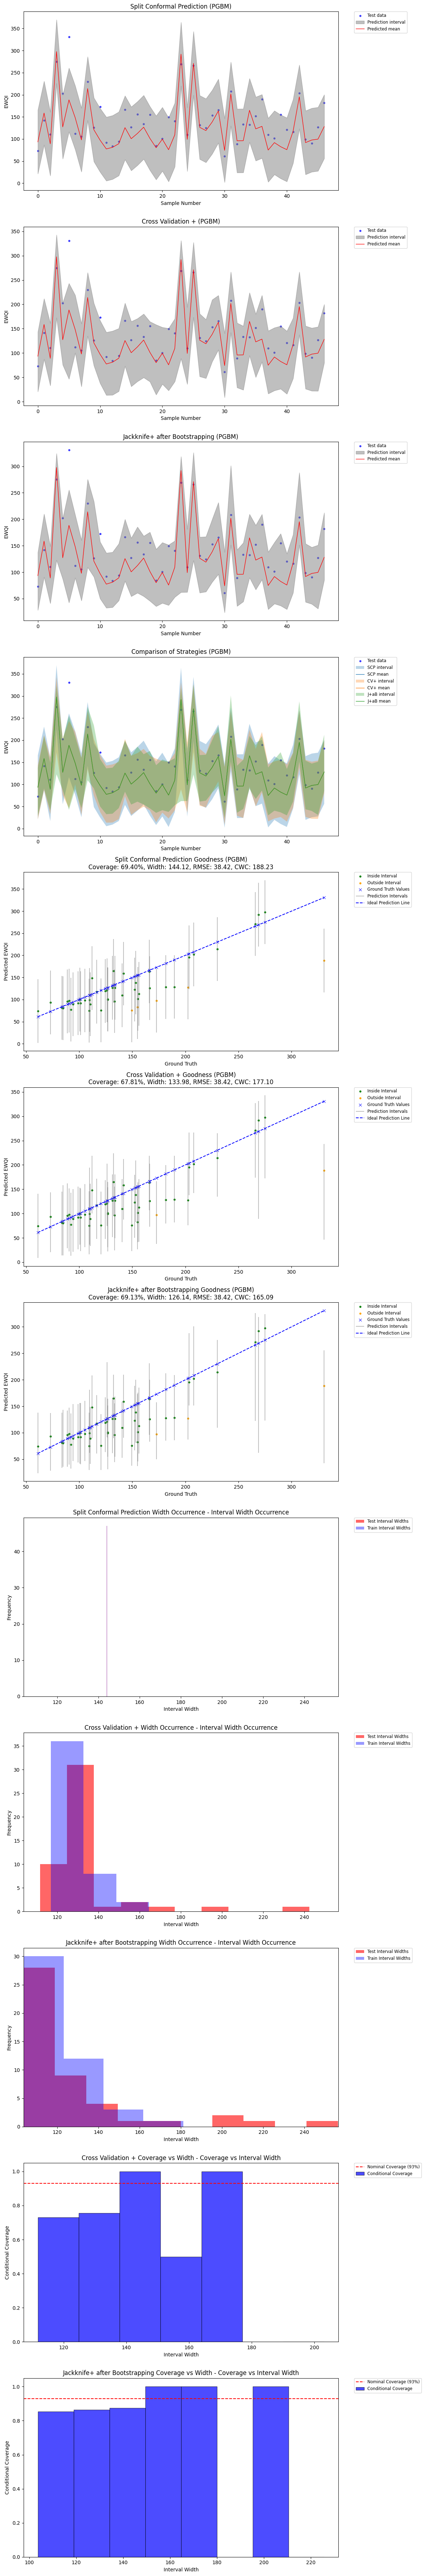

In [42]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax



def conformal_predictions_MAPIE_PGBM(
    model_class,
    best_params,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    excel_file_path
):
    SEED = 123
    np.random.seed(SEED)
    MISCOVERAGE = 0.07
    warnings.filterwarnings("ignore")
    os.makedirs('output/regression', exist_ok=True)

    # Convert y_test to a NumPy array if it has to_numpy
    y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

    # Map method names to descriptive labels
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }

    # Corresponding parameters for each strategy
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Create a base estimator object for each strategy
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    # Fit & predict using MapieRegressor for each strategy
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set


    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred)
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the intervals and predictions for each strategy
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names)*3 + 1 + len(_strategies)
    fig, axs = plt.subplots(nrows=n_figs, figsize=(12, 6 * n_figs))
    plot_index = 0

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                            color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red',
                                    label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('EWQI')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Comparison subplot (moved after individual strategy plots)
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                        alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name],
                                label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('EWQI')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1


    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted EWQI')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1


    fig.tight_layout()

    # Save plots to Excel
    # Save plots to Excel
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        sheet_name = 'conformal_predictions_MAPIE'
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        #NEW: Save all predictions/intervals to one worksheet
        all_rows = []
        # Always use y_test_np for consistent array-ness
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = ((y_test_np >= ymin_np) & (y_test_np <= ymax_np)).astype(int)
            residual_np = y_test_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_test_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np,
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet2 = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet2.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet2.cell(row=i+2, column=j, value=float(value) if isinstance(value, np.generic) else value)

        # Save the workbook
        workbook.save(excel_file_path)



# Example call (assuming best_params, X_train, y_train, X_test, y_test are defined elsewhere)
conformal_predictions_MAPIE_PGBM(
    model_class=PGBMWrapper,
    best_params=best_params,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    model_name="PGBM",
    excel_file_path="./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/PGBM.xlsx"
)

In [43]:
def conformal_predictions_PUNCC_PGBM(
    X_train,
    y_train,
    X_test,
    y_test,
    best_scores_autosampler,
    model_class,
    excel_file_path=None,
    model_params=None,
    alpha=0.1
):
    if model_params is None:
        if model_class.__name__ == 'PGBMWrapper':
            model_params = get_best_model_params(best_scores_autosampler, 'PGBM')
        else:
            model_params = {}

    # Initialize model
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    # Convert to NumPy arrays if needed
    y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
    model.fit(X_train, y_train_np)

    y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

    def evaluate_cp(X_test_eval, y_test_eval, model_cp, alpha_val):
        X_test_np = X_test_eval.to_numpy() if isinstance(X_test_eval, pd.DataFrame) else np.array(X_test_eval)
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test_np, alpha=alpha_val)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test_eval, y_pred_lower, y_pred_upper)
        return y_pred, y_pred_lower, y_pred_upper, sharpness, coverage

    # Base predictor setup
    base_predictor = BasePredictor(model, is_trained=True)

    # SplitCP
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train_np, fit_ratio=0.5)

    y_pred_sc, y_lower_sc, y_upper_sc, sharpness_sc, coverage_sc = evaluate_cp(X_test, y_test_np, splitcp, alpha)

    # CVPlus
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train_np)
    y_pred, y_lower_cv, y_upper_cv, sharpness_cv, coverage_cv = evaluate_cp(X_test, y_test_np, cvplus, alpha)

    # CQR
    X_fit, X_calib, y_fit, y_calib = train_test_split(X_train, y_train_np, test_size=0.5, random_state=0)
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)
    upper_quantile_model.fit(X_fit, y_fit)
    lower_quantile_model.fit(X_fit, y_fit)
    dualpredictor = DualPredictor([lower_quantile_model, upper_quantile_model], is_trained=[True, True])
    cqr = CQR(dualpredictor, train=False)
    cqr.fit(X_calib=X_calib, y_calib=y_calib)
    y_pred_cqr, y_lower_cqr, y_upper_cqr, sharpness_cqr, coverage_cqr = evaluate_cp(X_test, y_test_np, cqr, alpha)
    y_pred_cqr = 0.5 * (y_lower_cqr + y_upper_cqr)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness_sc:.3f}")
    print(f"SplitCP - Average coverage: {coverage_sc*100:.3f}%")
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness_cv:.3f}")
    print(f"CVPlus - Average coverage: {coverage_cv*100:.3f}%")
    print(f"CQR - Average prediction intervals width (sharpness): {sharpness_cqr:.3f}")
    print(f"CQR - Average coverage: {coverage_cqr*100:.3f}%")


    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    sample_indices = np.arange(len(y_test_np))

    # Plot results for each method
    for idx, (y_pred, y_lower, y_upper, title) in enumerate([
        (y_pred_sc, y_lower_sc, y_upper_sc, 'SplitCP'),
        (y_pred_sc, y_lower_cv, y_upper_cv, 'CVPlus'),
        (y_pred_cqr, y_lower_cqr, y_upper_cqr, 'CQR')
    ]):
        axs[idx].scatter(sample_indices, y_test_np, label='True', color='blue', s=10, alpha=0.7)
        axs[idx].fill_between(sample_indices, y_lower, y_upper, color='gray', alpha=0.5, label='Prediction interval')
        axs[idx].plot(sample_indices, y_pred, color='red', label='Predicted mean', linewidth=1)
        axs[idx].set_title(f'{title}: Prediction Intervals with Conformal Prediction')
        axs[idx].set_xlabel('Sample Number')
        axs[idx].set_ylabel('EWQI')
        axs[idx].legend(fontsize='small')

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_sc).reshape(-1),
        'SplitCP_lower': np.asarray(y_lower_sc).reshape(-1),
        'SplitCP_upper': np.asarray(y_upper_sc).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_sc).reshape(-1),
        'CVPlus_lower': np.asarray(y_lower_cv).reshape(-1),
        'CVPlus_upper': np.asarray(y_upper_cv).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_upper_cqr).reshape(-1),
    }

    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

# Example usage (assuming X_train, y_train, X_test, y_test, best_scores_autosampler exist):
conformal_predictions_PUNCC_PGBM(
    X_train, y_train,
    X_test, y_test,
    best_scores_autosampler=best_scores_autosampler,
    model_class=PGBMWrapper,
    excel_file_path="./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/PGBM.xlsx",
    alpha=0.1
)


Training on CPU
Estimator 0/500, Train metric: 51.8040
Estimator 1/500, Train metric: 47.6403
Estimator 2/500, Train metric: 44.2211
Estimator 3/500, Train metric: 40.4811
Estimator 4/500, Train metric: 37.0778
Estimator 5/500, Train metric: 34.0711
Estimator 6/500, Train metric: 32.2726
Estimator 7/500, Train metric: 30.0074
Estimator 8/500, Train metric: 27.9378
Estimator 9/500, Train metric: 25.4829
Estimator 10/500, Train metric: 23.6093
Estimator 11/500, Train metric: 22.0989
Estimator 12/500, Train metric: 20.4743
Estimator 13/500, Train metric: 19.4300
Estimator 14/500, Train metric: 18.2014
Estimator 15/500, Train metric: 17.0535
Estimator 16/500, Train metric: 16.5485
Estimator 17/500, Train metric: 15.7829
Estimator 18/500, Train metric: 15.1467
Estimator 19/500, Train metric: 14.6958
Estimator 20/500, Train metric: 14.0259
Estimator 21/500, Train metric: 13.6423
Estimator 22/500, Train metric: 12.8222
Estimator 23/500, Train metric: 12.5842
Estimator 24/500, Train metric: 12

In [44]:
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, PGBMWrapper, best_params,"./drive/MyDrive/WATER QUALITY/EWQI_uncertainity/EWQI_ml/Conformal_Predictions/PGBM.xlsx", "PGBM Prediction Intervals")

Training on CPU
Estimator 0/100, Train metric: 52.2671
Estimator 1/100, Train metric: 48.3172
Estimator 2/100, Train metric: 44.7059
Estimator 3/100, Train metric: 41.3584
Estimator 4/100, Train metric: 38.3272
Estimator 5/100, Train metric: 35.5488
Estimator 6/100, Train metric: 32.9998
Estimator 7/100, Train metric: 30.6638
Estimator 8/100, Train metric: 28.4820
Estimator 9/100, Train metric: 26.4924
Estimator 10/100, Train metric: 24.6690
Estimator 11/100, Train metric: 23.0332
Estimator 12/100, Train metric: 21.5144
Estimator 13/100, Train metric: 20.1305
Estimator 14/100, Train metric: 18.8846
Estimator 15/100, Train metric: 17.7416
Estimator 16/100, Train metric: 16.6910
Estimator 17/100, Train metric: 15.7308
Estimator 18/100, Train metric: 14.8533
Estimator 19/100, Train metric: 14.0554
Estimator 20/100, Train metric: 13.3367
Estimator 21/100, Train metric: 12.6529
Estimator 22/100, Train metric: 12.0525
Estimator 23/100, Train metric: 11.4751
Estimator 24/100, Train metric: 10